Fundamentos de Aprendizaje Profundo

# Laboratorio N°1 - Perceptrón simple

---


Importación de bibliotecas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# New seed
np.random.seed(10)

## Actividad 1 - Perceptrón simple genérico

La clase Perceptrón permite generar un perceptrón genérico el que será entrenado de acuerdo a los parámetros que reciba. Para crearlo se requieren de cuatro parámetros, dos de los cuales son opcionales (*):


1.   **input_data:** Dataframe que contiene la información a ser clasificada.
2.   **desired_responses:** Dataframe que contiene la clasificación de la información de entrada, es decir, la respuesta deseada.
3.   **learning_rate*:** Valor numérico. Indica la tasa de aprendizaje del modelo.
4.   **bias*:** Valor númerico. Sirve para desplazar la función de activación y mejorar la eficiencia del perceptrón.


Luego, se tienen las funciones definidas para el perceptrón genérico:


1.   **reset(bias):** Para restablecer los pesos y el *bias* del perceptrón.
2.   **predict(inputs):** Predecir la respuesta utilizando las entradas dadas y los pesos que tiene actualmente el perceptrón.
3.   **train(iterations):** Entrenar el perceptrón en n iteraciones utilizando la información entregada en la inicialización (*input_data* y *desired_responses*), calculando el error de las predicciones incorrectas y modificando levemente el *bias*.
4.   **plot_error(title, x_label, y_label):** Realiza y muestra un gráfico de línea del error que presentó el perceptrón en su entrenamiento. Este gráfico tendrá el título y etiquetas de eje que se le haya entregado en los parámetros.

Por otro lado se tiene una función global que permite graficar un set datos de dos dimensiones. Esta función es:

*   **plot_dataset(input_data, desired_responses, title, x_label, y_label, labels):** Gráfica los puntos en el espacio de los datos de entrada, poniendo en color rojo a los datos que esperan un '1' de respuesta y en verde a los que esperan un '0'. Sirve para visualizar si el set de datos es linealmente separable.

In [0]:
class Perceptron(object):
  
  def __init__(self, input_data, desired_responses, learning_rate = 0.02, bias = 0.0):
    self.input_data = input_data.to_numpy()
    self.rows, self.cols = input_data.shape
    self.desired_responses = desired_responses.to_numpy()
    self.learning_rate = learning_rate
    self.reset(bias)
    
  def reset(self, bias = 0.0):
    self.weights = np.random.rand(self.cols + 1)
    self.weights[0] = bias
    
  def predict(self, inputs):
    inputs = np.insert(inputs, 0, +1)
    summation = np.dot(inputs, self.weights)
    return 1 if summation > 0 else 0
  
  def train(self, iterations):
    self.error = np.array([])
    for _ in range(iterations):
      mistakes = 0
      for inputs, desired in zip(self.input_data, self.desired_responses):        
        predicted = self.predict(inputs)
        self.weights[1:] += self.learning_rate * (desired - predicted) * inputs
        self.weights[0] += self.learning_rate * (desired - predicted)
        
        if desired != predicted:
          mistakes += 1
      self.error = np.insert(self.error, len(self.error), 100 * (float(mistakes) / self.rows) )

  def plot_error(self, title = "", x_label = "", y_label = ""):
    try:
      plt.plot(self.error)
      plt.title(title)
      plt.xlabel(x_label)
      plt.ylabel(y_label)
      plt.grid()
      plt.show()
    except AttributeError:
      print("Please train this perceptron first")

def plot_dataset(input_data, desired_responses, title = "", x_label = "", y_label = "", labels = "",):
  if labels == "":
    labels = ['0', '1']
  colors = ['green', 'red']

  input_data0 = np.empty((0, 2), int)
  input_data1 = np.empty((0, 2), int)
  for response_index in range(len(desired_responses)):
    if desired_responses[response_index] == 0:
      input_data0 = np.vstack([input_data0, input_data[response_index]])
    else:
      input_data1 = np.vstack([input_data1, input_data[response_index]])

  plt.scatter(x = input_data0[:,0], y = input_data0[:,1], color = colors[0], label = labels[0])
  plt.scatter(x = input_data1[:,0], y = input_data1[:,1], color = colors[1], label = labels[1])
  plt.legend()
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid()
  plt.show()

## Actividad 2 - Perceptrón aplicado a compuertas lógicas (AND, OR y XOR)

### Pre-procesamiento de datos

In [0]:
# Url donde se encuentra el archivo and.csv
urlAND = 'https://raw.githubusercontent.com/Uriyah3/Lab_aprendizaje_profundo-2019-2/master/1-%20Perceptr%C3%B3n%20Simple/and.csv'
urlOR = 'https://raw.githubusercontent.com/Uriyah3/Lab_aprendizaje_profundo-2019-2/master/1-%20Perceptr%C3%B3n%20Simple/or.csv'
urlXOR = 'https://raw.githubusercontent.com/Uriyah3/Lab_aprendizaje_profundo-2019-2/master/1-%20Perceptr%C3%B3n%20Simple/xor.csv'

dataAND = pd.read_csv(urlAND, header = None)
dataOR = pd.read_csv(urlOR, header = None)
dataXOR = pd.read_csv(urlXOR, header = None)

andPerceptron = Perceptron(dataAND.iloc[:, 0:4], dataAND.iloc[:,4:], 0.02, 0.5)
orPerceptron = Perceptron(dataOR.iloc[:, 0:4], dataOR.iloc[:,4:], 0.02, 0.5)
xorPerceptron = Perceptron(dataXOR.iloc[:, 0:4], dataXOR.iloc[:,4:], 0.02, 0.5)



### Entrenamiento

In [0]:
iterations = 80
andPerceptron.train(iterations)
orPerceptron.train(iterations)
xorPerceptron.train(iterations)

### Cálculo del error

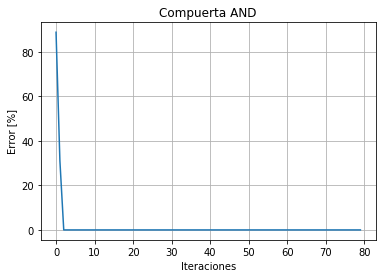

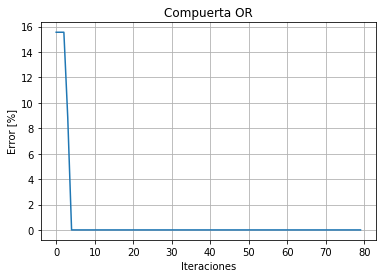

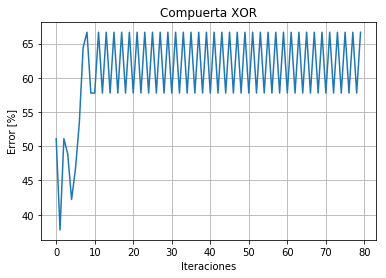

In [0]:
andPerceptron.plot_error("Compuerta AND", "Iteraciones", "Error [%]")
orPerceptron.plot_error("Compuerta OR", "Iteraciones", "Error [%]")
xorPerceptron.plot_error("Compuerta XOR", "Iteraciones", "Error [%]")

*   **Para la compuerta AND**: hay una variación abrupta del porcentaje de error en las primeras 10 a 12 iteraciones, la cual converge rapidamente con el paso de estas hasta alcanzar un porcentaje de error cercano a 0% (en referencia al gráfico)
*   **Para la compuerta OR**:, para esta compuerta ocurre algo similar que en la compuerta AND, en este caso es aún más abrupta la disminución del porcentaje de erro y alcanza la convergencia en iteraciones más tempranas.
*   **Para la compuerta XOR**:, se visualiza un caso especial, ya que la compuerta en cuestión y los elementos en el conjunto de posibles resultados dados por su tabla de verdad no son linealmente separables, tál como muestra el gráfico del data set descrito en el gráfico previo del XOR, no hay una sola línea o hiperplano que separe a lo elementos del conjunto en dos conjuntos con sus características. Por lo tanto, a nivel gráfico, hay un error que, en caso contrario al AND y al OR, aumenta en sus primeras iteraciones y se mantiene divergiendo de un solo valor.

### Gráfico de los set de datos

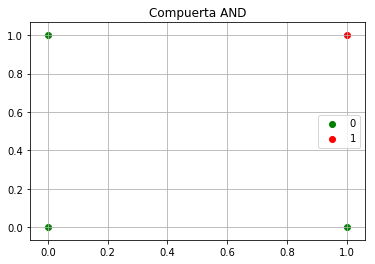

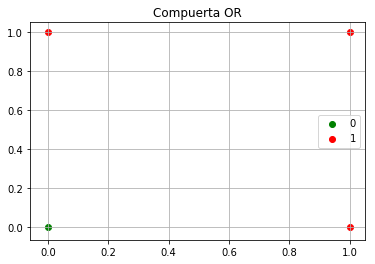

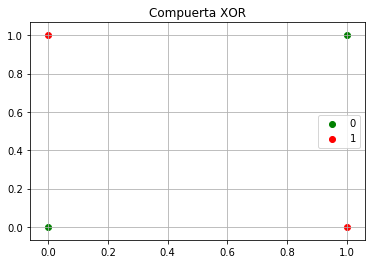

In [0]:
plot_dataset([[0, 0], [0, 1], [1, 0], [1, 1]], [0, 0, 0, 1], 'Compuerta AND')
plot_dataset([[0, 0], [0, 1], [1, 0], [1, 1]], [0, 1, 1, 1], 'Compuerta OR')
plot_dataset([[0, 0], [0, 1], [1, 0], [1, 1]], [0, 1, 1, 0], 'Compuerta XOR')

### Probando predicción

Se prueban algunas entradas son parte del dataset para comprobar que el perceptrón clasifica de manera correcta



In [0]:
print(andPerceptron.predict([1, 1, 1, 0]))
print(andPerceptron.predict([1, 1, 1, 1]))

print(orPerceptron.predict([0, 0, 0, 0]))
print(orPerceptron.predict([0, 1, 0, 0]))

print(xorPerceptron.predict([1, 0, 0, 1]))
print(xorPerceptron.predict([1, 1, 1, 1]))

0
1
0
1
1
1


* Es posible comprobar que los resultados obtenidos mediante la predicción de los ejemplos para el caso de las compuertas lógicas AND y OR es igual a los resultados esperados de los set de datos disponibles. Esto significa que el entrenamiento de este perceptrón para estos casos en particular funcionó correctamente.
Por otro lado, los resultados de la predicción con la compuerta XOR, generó resultados erróneos, debido a las características del problema que implica una compuerta XOR, un problema no linealmente separable.


## Actividad 3 - Perceptrón implementado para clasificar las entradas del archivo "letters.csv"

### Pre-procesamiento de datos

In [0]:
# Url donde se encuentra el archivo letters.csv
url = 'https://raw.githubusercontent.com/Uriyah3/Lab_aprendizaje_profundo-2019-2/master/1-%20Perceptr%C3%B3n%20Simple/letters.csv'

data = pd.read_csv(url, header = None)

lettersPerceptron = Perceptron(data.iloc[:, 0:2], data.iloc[:,2:].replace(['o', 'l'], [0, 1]), 0.02, 1.5)
quotientPerceptron = Perceptron(data.iloc[:, 0:1] / data.iloc[:, 1:2], data.iloc[:,2:].replace(['o', 'l'], [0, 1]), 0.05, 1)



### Entrenamiento

In [0]:
iterations = 80
lettersPerceptron.train(iterations)
quotientPerceptron.train(iterations)

### Cálculo del error

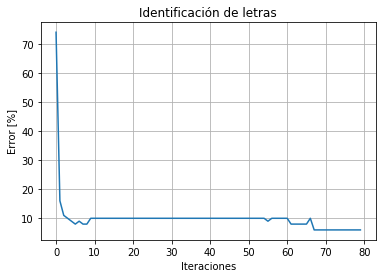

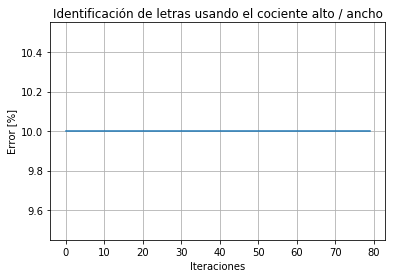

In [0]:
lettersPerceptron.plot_error("Identificación de letras", "Iteraciones", "Error [%]")
quotientPerceptron.plot_error("Identificación de letras usando el cociente alto / ancho", "Iteraciones", "Error [%]")

* **Para la identificación de letras utilizando dos características**: el ancho y el alto, es posible ver la disminución significativa del porcentaje de error en las primeras iteraciones, luego en las siguientes iteraciones se presenta un porcentaje de error variante con una variación de cerca de +-5% hasta llegar a un estado de convergencia del porcentaje de error.
Lo anterior se explica porque la fase de entrenamiento del perceptrón parte con parámetros arbitrarios y pesos ajustados aleatoriamente, por lo que se entiende un porcentaje alto en las primeras iteraciones, lo que varía rápidamente, debido al efecto del paso y de la diferencia entre la salida y el resultado esperado entre cada iteración. Hay una situación interesante que se da al momento de entrenar y al ver el error cerca de las 30 a 60 iteraciones, ya que el error varía aumentando y disminuyendo levemente para luego converger en armonía, esto se explica en las imágenes a continuación, y se produce porque la línea que separa los conjuntos de elementos dado un punto, pivotea entre los puntos que deja dentro como aquellos que deja fuera de la clasificación, sin llegar a una separación perfecta, pero aproximada para el dataset de entrenamiento.

**Figuras de ejemplo en identificación de letras, variación de error**

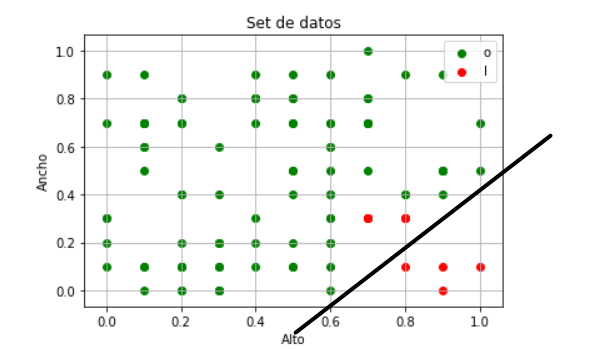

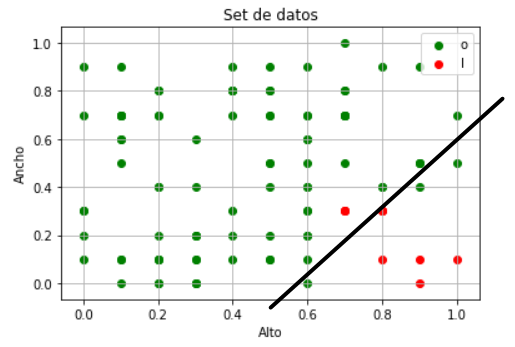


* **Para la identificación de letras según el cuociente entre el alto y el ancho**: es posible ver cómo el porcentaje de error se mantiene constante en 10%, esto se debe a que el cuociente es la única caractetística de entrada al perceptrón, por lo tanto hay una sola clasificación posible para una sola entrada, por lo que el perceptrón no varía en error utilizando dicha configuración.

### Gráfico del set de datos

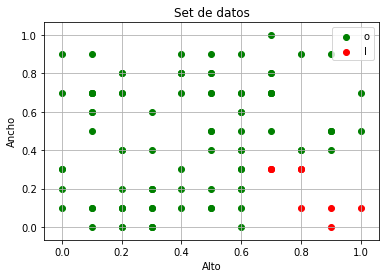

In [0]:
plot_dataset(lettersPerceptron.input_data, lettersPerceptron.desired_responses, 'Set de datos', 'Alto', 'Ancho', ['o', 'l'])

## Conclusiones

En base a la experiencia realizada podemos dar por cumplidos los objetivos.

> * Se construyó un Perceptrón simple genérico, con las características estudiadas en la teoría, que permite múltiples entradas, una función de activación, pesos ajustables y aprendizaje para clasificación de clases en base a características de los sets de datos.
> * Se probó la capacidad del Perceptrón simple en la clasificación de tablas de verdad de compuertas lógicas AND y OR y se verificó la incapacidad del Perceptrón simple para trabajar con la compuerta lógica XOR, debido a las características del problema, es decir, no existe una separación lineal para los elementos de ese conjunto.
>> * Se midió e interpretó gráficamente el comportamiento del porcentaje de error al entrenar al perceptrón simple por varias iteraciones en sus distintas configuraciones de compuertas lógicas, logrando entender el comportamiento de AND, OR y XOR, verificando como es mencionado anteriormente, la incapacidad inherente del Perceptrón sobre esta última compuerta.
>* De igual forma, se probó la capacidad del Perceptrón simple en la clasificación de letras según su ancho y alto, así como también mediante un cociente entre su alto y ancho, permitiendo determinar la efectividad de este modelo ante este problema.
>> * Así también se comprobó el comportamiento del error del Perceptrón según la cantidad de iteraciones que este utiliza para el entrenamiento.

Podemos concluir que, si bien el Perceptrón simple permite resolver algunos de estos problemas, por sí solo no posee mucha utilidad más que ser una comprobación empírica del modelo neuronal planteado por Frank Rosenblatt. Por lo que creemos que el estudio de este Perceptrón simple puede llevar a temas muchos más complejos como las redes multicapas y otros modelos de redes neuronales que permitirán abordar problemas de mayor complejidad.